In [1]:
import numpy as np
from data1 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate
from kMeans import kMeans, min_k_index, max_k_index
import copy

In [2]:
def ramp_weight(alpha,beta,r,n):
    w=np.zeros(n)
    for i in range(r):
        w[i]=(r-i+1)*beta
    w=w+alpha
    return w

In [3]:
def store(coef,B,index):
    n=len(coef)
    if index == 0:
        for i in range(n):
            B[i+1,index]=coef[i]
    elif index==n:
        for i in range(n):
            B[i,index]=coef[i]
    else:
        for i in range(index):
            B[i,index]=coef[i]
        for i in range(index,n):
            B[i+1,index]=coef[i]
    return B

In [4]:
def reshapeL(l):
    n=len(l)
    m=len(l[0])
    L=[]
    for i in range(m):
        x=[]
        for j in range(n):
            x.append(X[j][i])
        L.append(x)
    return L

In [5]:
def get_B(data,indexs,B,alpha,beta,r):
    n_sample=len(data[0])
    n_feature=len(data)
    for index in indexs:
        X=np.zeros((n_sample,n_feature-1))
        if index == 0:
            for i in range(n_feature-1):
                X[:,i]=data[i+1]
        elif index == n_feature-1:
            for i in range(n_feature-1):
                X[:,i]=data[i]
        else:
            for i in range(index):
                X[:,i]=data[i]
            for i in range(index,n_feature-1):
                X[:,i]=data[i+1]
        Y=np.array(data[index])
        #oscar_owl = OwlRegressor(weights=np.ones(n_feature-1) * alpha)
        #oscar_owl.fit(X,Y)
        #B=store(oscar_owl.coef_,B,index)
        #oscar_owl = OwlRegressor(weights=(alpha,beta))
        #oscar_owl.fit(X,Y)
        #B=store(oscar_owl.coef_,B,index)
        #lasso=Lasso(alpha,max_iter=10000)
        #lasso.fit(X,Y)
        #B=store(lasso.coef_,B,index)
        ramp_owl=OwlRegressor(weights=ramp_weight(alpha,beta,r,n_feature-1))
        ramp_owl.fit(X,Y)
        B=store(ramp_owl.coef_,B,index)
    return B

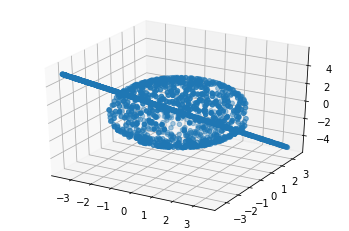

In [6]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [7]:
n_sample=len(data[0])
n_feature=len(data)

In [8]:
alpha=0.5
beta=0.02
r=1000
k=200

In [9]:
indexs=np.random.choice(range(n_feature),k)
B=np.zeros((n_feature,n_feature))

In [10]:
s=0
for index in indexs:
    if index<1000:
        s=s+1
s

104

In [11]:
B=get_B(data,indexs,B,alpha,beta,r)
W=np.abs(B)
#W=B+B.T

In [12]:
nonzero=[]
for index in range(1000):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(1000):
    if nonzero[i]!=0:
        nonzero_idx.append(i)
np.count_nonzero(B[:,nonzero_idx[0]])

1939

In [13]:
len(nonzero_idx)

56

In [14]:
index=nonzero_idx[0]
n=10
idx=[]
for i in range(1,n):
    idx.append(max_k_index(B[:,index],i))
s=0
for i in idx:
    if i>1000:
        s=s+1
s

1

In [15]:
data[index]

[0.0511298996216083, -1.4726558523393585, 2.613172492189393]

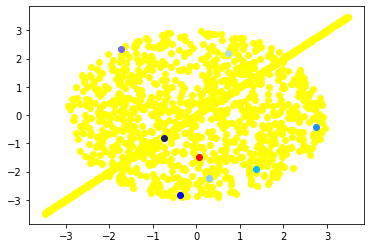

In [16]:
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
ax.scatter(x[idx[0]],y[idx[0]],color='midnightblue')
ax.scatter(x[idx[1]],y[idx[1]],color='blue')
ax.scatter(x[idx[2]],y[idx[2]],color='mediumslateblue')
ax.scatter(x[idx[3]],y[idx[3]],color='dodgerblue')
ax.scatter(x[idx[4]],y[idx[4]],color='deepskyblue')
ax.scatter(x[idx[5]],y[idx[5]],color='lightskyblue')
ax.scatter(x[idx[6]],y[idx[6]],color='powderblue')

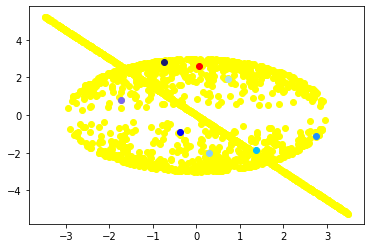

In [17]:
ax=plt.subplot(111)
ax.scatter(x,z,color='yellow')
ax.scatter(x[index],z[index],color='red')
ax.scatter(x[idx[0]],z[idx[0]],color='midnightblue')
ax.scatter(x[idx[1]],z[idx[1]],color='blue')
ax.scatter(x[idx[2]],z[idx[2]],color='mediumslateblue')
ax.scatter(x[idx[3]],z[idx[3]],color='dodgerblue')
ax.scatter(x[idx[4]],z[idx[4]],color='deepskyblue')
ax.scatter(x[idx[5]],z[idx[5]],color='lightskyblue')
ax.scatter(x[idx[6]],z[idx[6]],color='powderblue')

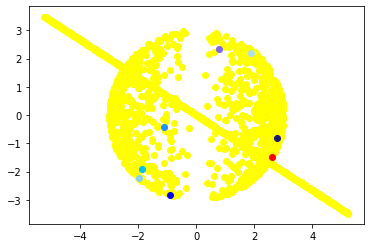

In [18]:
ax=plt.subplot(111)
ax.scatter(z,y,color='yellow')
ax.scatter(z[index],y[index],color='red')
ax.scatter(z[idx[0]],y[idx[0]],color='midnightblue')
ax.scatter(z[idx[1]],y[idx[1]],color='blue')
ax.scatter(z[idx[2]],y[idx[2]],color='mediumslateblue')
ax.scatter(z[idx[3]],y[idx[3]],color='dodgerblue')
ax.scatter(z[idx[4]],y[idx[4]],color='deepskyblue')
ax.scatter(z[idx[5]],y[idx[5]],color='lightskyblue')
ax.scatter(z[idx[6]],y[idx[6]],color='powderblue')

In [19]:
data[idx[0]]

[-0.7455786150548684, -0.7996915696208733, 2.793672479416685]

In [20]:
B[:,index][idx[0]]

0.0001343649718181526

In [21]:
data[idx[1]]

[-0.3829191994186898, -2.830563252980277, -0.9172156549003414]

In [22]:
B[:,index][idx[1]]

0.00013309123584769297

In [23]:
data[idx[2]]

[-1.7253570138583036, 2.326459189074347, 0.7814926847395879]

In [24]:
B[:,index][idx[2]]

-0.00013304358850555533

In [25]:
L=get_laplace(W)

In [26]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

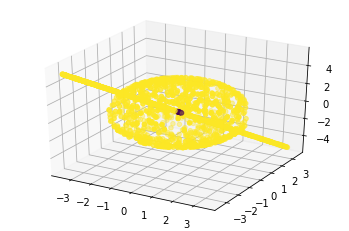

In [27]:
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [28]:
mdat1=np.zeros((n_feature,1))
mdat1[:,0]=v[:,min_k_index(u,2)]

In [32]:
pre_idx1=kMeans(mdat1,2)[:,0]

In [33]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
data_1=[]
data_2=[]
for i in range(len(pre_idx1)):
    if pre_idx1[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data[i])
    else:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data[i])

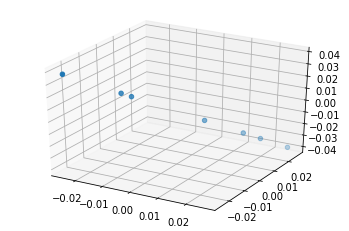

In [34]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_2,y_2,z_2)

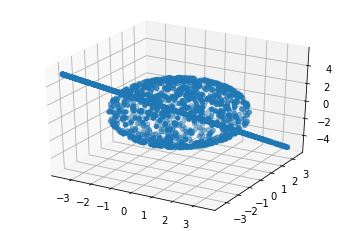

In [35]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)

In [36]:
L=knn_laplace(data,8)

In [21]:
u1,v1=np.linalg.eig(L)
v1=np.real(v1)
u1=np.real(u1)

In [22]:
sorted(abs(u1))

[1.344456461908482e-15,
 3.4878061331557088e-15,
 1.1233110806800126e-14,
 1.8555145055415732e-14,
 2.369650556065379e-14,
 0.0001583535067993579,
 0.0007429020054330928,
 0.0016935489238874312,
 0.0021459093548225824,
 0.0032359350236424267,
 0.004500078523250931,
 0.004808058831784518,
 0.004974848587412986,
 0.005939715987759665,
 0.008386204519802631,
 0.008916817462835309,
 0.009534176990962933,
 0.01393505045586766,
 0.01590684352474957,
 0.016816295372567052,
 0.02078826679411093,
 0.02707405439544698,
 0.028323165481964428,
 0.03275761218284442,
 0.033136701924297324,
 0.0340504382807313,
 0.03510515564932836,
 0.03819209701480094,
 0.03916830143525499,
 0.03921729608827482,
 0.050828120953267227,
 0.05558881756425463,
 0.05613032290470462,
 0.0701844344740085,
 0.07123745239312462,
 0.07127423036947055,
 0.07786362320730209,
 0.09200156866036047,
 0.10147103215698992,
 0.11838698073790395,
 0.12176384446062052,
 0.1287447028127475,
 0.1316214217271731,
 0.1349365387333602,
 0.

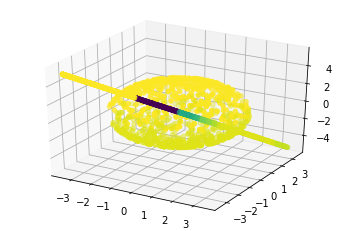

In [23]:
ax=plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v1[:,min_k_index(abs(u1),3)])

In [24]:
mdat2=np.zeros((n_feature,3))
mdat2[:,0]=v1[:,min_k_index(u1,1)]
mdat2[:,1]=v1[:,min_k_index(u1,2)]
mdat2[:,2]=v1[:,min_k_index(u1,3)]

In [25]:
pre_idx2=kMeans(mdat2,3)[:,0]

In [26]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
x_3=[]
y_3=[]
z_3=[]
data_1=[]
data_2=[]
data_3=[]
for i in range(len(pre_idx2)):
    if pre_idx2[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data[i])
    elif pre_idx2[i]==1:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data[i])
    else:
        x_3.append(x[i])
        y_3.append(y[i])
        z_3.append(z[i])
        data_3.append(data[i])

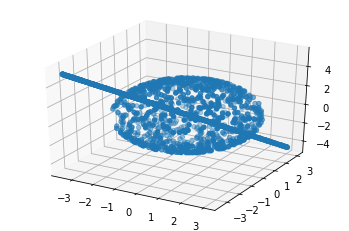

In [27]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)

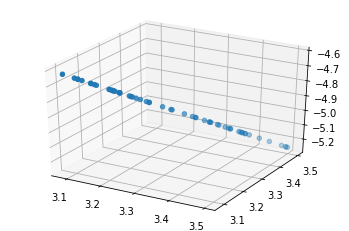

In [28]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_2,y_2,z_2)

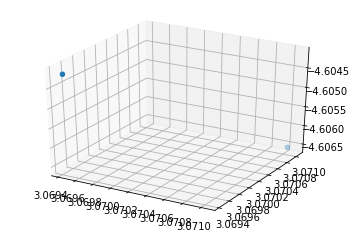

In [29]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_3,y_3,z_3)

In [30]:
c,d=extend_knn(data_3,data,5)

In [31]:
for i in range(10):
    c,d=extend_knn(c,d,5)

KeyboardInterrupt: 

In [ ]:
c_c=cordinate(c,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(c_c[0],c_c[1],c_c[2])

In [ ]:
d_c=cordinate(d,3)
ax=plt.subplot(111,projection="3d")
ax.scatter(d_c[0],d_c[1],d_c[2])

In [ ]:
np.arange(20 - 1, -1, -1, dtype=np.double)

In [8]:
t=np.zeros(10)

In [9]:
for i in range(5):
    t[i]+=(10-i+1)*0.1

In [11]:
t+1

array([2.1, 2. , 1.9, 1.8, 1.7, 1. , 1. , 1. , 1. , 1. ])

In [17]:
ramp_weight(alpha,beta,r,2000)

array([1.002e+02, 1.001e+02, 1.000e+02, ..., 1.000e-01, 1.000e-01,
       1.000e-01])